<a href="https://colab.research.google.com/github/sgcortes/2023_NAPLES/blob/main/Lect5_1_cnn_mnistC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="width:100%">
  <tr>
    <td><img src="https://unioviedo-my.sharepoint.com/:i:/g/personal/sgcortes_uniovi_es/Ebr0ybKDTBNKtoJyzmTBuRYBXY7nE-cCYaH-WDIVJxEVWA?&download=1" width="211" height="69" alt="Uniovi & EP Mieres logos" title="Uniovi & EP Mieres logos" /></td>
    <td><font color=brown>Deep Learning<br></font>
    <font color=green>Universidad de Oviedo. <br>ML & DL Naples 2023</font> <br><br>sgcortes@uniovi.es</td>
  </tr>
</table>

# Example Written characters recognition (MNIST digits dataset). Convolutional Neural Network

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, SpatialDropout2D
from keras.utils.vis_utils import plot_model

import matplotlib.pyplot as plt
import numpy as np

### Loading the dataset

In [2]:
#load mnist dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data() #everytime loading data won't be so easy :)

Dims. Train feature matrix:
 (60000, 28, 28) 
 DataType. Train feature matrix:
 uint8
Dims. Train class label vector:
 (60000,) 
 DataType. Train class label vector:
 uint8
Dims. Test feature matrix:
 (10000, 28, 28) 
 DataType. Test feature matrix:
 uint8
Dims. Test class label vector:
 (10000,) 
 DataType. Test class label vector:
 uint8


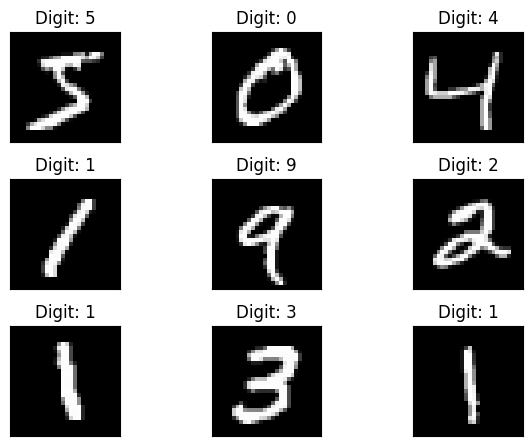

In [3]:
#visualising first 9 data from training dataset
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])

print(f'Dims. Train feature matrix:\n', X_train.shape, f'\n DataType. Train feature matrix:\n',X_train.dtype)

print(f'Dims. Train class label vector:\n', y_train.shape, f'\n DataType. Train class label vector:\n',y_train.dtype)

print(f'Dims. Test feature matrix:\n', X_test.shape, f'\n DataType. Test feature matrix:\n',X_test.dtype)

print(f'Dims. Test class label vector:\n', y_test.shape, f'\n DataType. Test class label vector:\n',y_test.dtype)


In [4]:
#input image size 28*28
img_rows , img_cols = 28, 28

In [5]:
#reshaping
#this assumes our data format
#For 3D data, "channels_last" assumes (conv_dim1, conv_dim2, conv_dim3, channels) while 
#"channels_first" assumes (channels, conv_dim1, conv_dim2, conv_dim3).

print(keras.backend.image_data_format())
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
#more reshaping
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print('X_test shape:', X_test.shape)
print(X_test.shape[0], 'test samples')

channels_last
X_train shape: (60000, 28, 28, 1)
60000 train samples
X_test shape: (10000, 28, 28, 1)
10000 test samples


In [6]:
print(np.unique(y_train, return_counts=True))
clases = np.unique(y_train)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


In [7]:
#set number of categories
num_category = 10

### Data normalization
We convert the class vector to one-hot binary encoding

In [8]:
# convert class vectors to binary class matrices
y_train1 = y_train.copy()# to check validation
y_train = keras.utils.to_categorical(y_train, num_category)
y_test1 = y_test.copy()# to check validation
y_test = keras.utils.to_categorical(y_test, num_category)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Model definition
Here we can instanciate the model and add as many layers as we need.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 spatial_dropout2d (SpatialD  (None, 12, 12, 64)       0         
 ropout2D)                                                       
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 250)               2

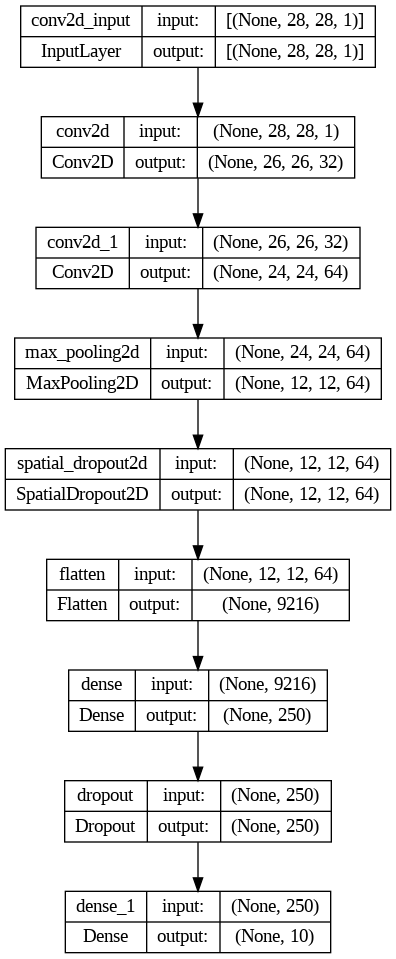

In [9]:
##model building
model = Sequential()
#convolutional layer with rectified linear unit activation
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
#32 convolution filters used each of size 3x3

model.add(Conv2D(64, (3, 3), activation='relu'))
#64 convolution filters used each of size 3x3

#choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

#randomly turn neurons on and off to improve convergence
model.add(SpatialDropout2D(0.25))

#flatten since too many dimensions, we only want a classification output
model.add(Flatten())

#fully connected to get all relevant data
model.add(Dense(250, activation='relu'))

#one more dropout for convergence' sake :) 
model.add(Dropout(0.5))

#output a softmax act. fucnt.to get output probabilities for each class
model.add(Dense(num_category, activation='softmax'))

model.summary()

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## Cost Function, optimizer and error metric evaluation:
Meanwhile we compile the model it is neccesary to indicate the cost function, optimizer and metric.

In [10]:
#Adaptive learning rate (adaDelta) is a popular form of gradient descent rivaled only by adam and adagrad
#categorical cross entropy, since we have multiple classes (10) 
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

## TRAINING
Training parameters are define while invoking the _fit_ method.
* Batch size: trining _set_ size 
* Epoch number


In [11]:
batch_size = 32
num_epoch = 25
#model training
model_log = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/25
1875/1875 [==============================] - 20s 8ms/step - loss: 2.2123 - accuracy: 0.2699 - val_loss: 2.0703 - val_accuracy: 0.6569
Epoch 2/25
1875/1875 [==============================] - 11s 6ms/step - loss: 1.9143 - accuracy: 0.5468 - val_loss: 1.6289 - val_accuracy: 0.7736
Epoch 3/25
1875/1875 [==============================] - 9s 5ms/step - loss: 1.4632 - accuracy: 0.6599 - val_loss: 1.1129 - val_accuracy: 0.8122
Epoch 4/25
1875/1875 [==============================] - 10s 5ms/step - loss: 1.0860 - accuracy: 0.7158 - val_loss: 0.7848 - val_accuracy: 0.8389
Epoch 5/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.8680 - accuracy: 0.7505 - val_loss: 0.6197 - val_accuracy: 0.8548
Epoch 6/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.7463 - accuracy: 0.7788 - val_loss: 0.5278 - val_accuracy: 0.8711
Epoch 7/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6644 - accuracy: 0.8003 - val_loss: 0.4702 - val_accu

## Validation precisions.(Test set)

In [12]:
#how well did it do? 
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.25997161865234375
Test accuracy: 0.9241999983787537


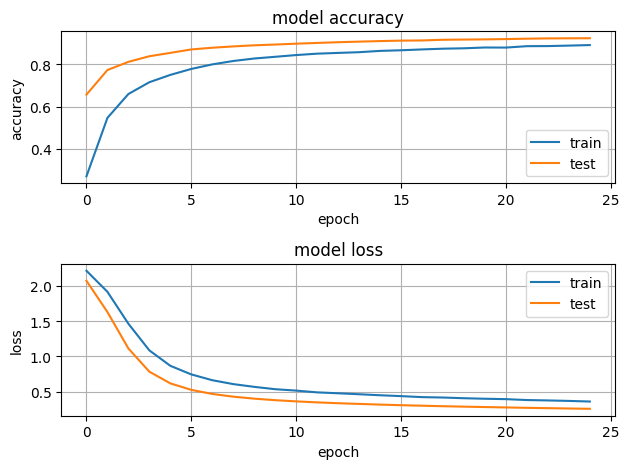

In [13]:
import os
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid('on')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid('on')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()


### Predictions

In [14]:
y_prob_train = model.predict(X_train)
y_prob_test = model.predict(X_test)

y_pred_train = np.argmax(y_prob_train, axis=1)
y_pred_test = np.argmax(y_prob_test, axis=1)
print(y_pred_train[0:5])

313/313 [==============================] - 1s 2ms/step
[5 0 4 1 9]


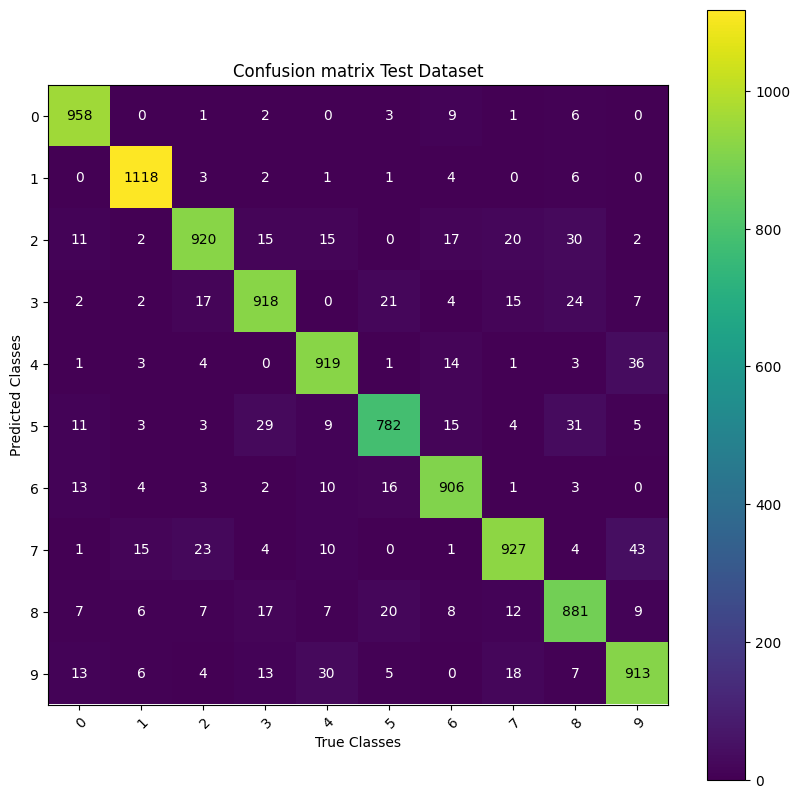

In [15]:
from sklearn.metrics import confusion_matrix

# Matriz de confusion
cm = confusion_matrix(y_test1, y_pred_test)

# Gráficas matriz confusion
fig,ax = plt.subplots(figsize=(10,10))
im = ax.imshow(cm, interpolation='nearest')
ax.figure.colorbar(im, ax=ax)

# Añade títulos y etiquetas al gráfico
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=clases, yticklabels=clases,
       title='Confusion matrix Test Dataset',
       ylabel='Predicted Classes',
       xlabel='True Classes')

# Rota los nombres de las etiquetas en el eje x
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
        rotation_mode="anchor")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j,i, cm[i,j],
               ha="center", va="center",
               color="white" if cm[i,j] <350 else "black")
plt.show()

In [16]:
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import f1_score, recall_score
from sklearn.metrics import confusion_matrix


acc_train = accuracy_score(y_train1, y_pred_train)
acc_test = accuracy_score(y_test1, y_pred_test)

prec_train = precision_score(y_train1, y_pred_train, average='macro')
prec_test = precision_score(y_test1, y_pred_test, average='macro')

rec_train = recall_score(y_train1, y_pred_train, average='macro')
rec_test = recall_score(y_test1, y_pred_test, average='macro')

f1_train = f1_score(y_train1, y_pred_train, average='macro')
f1_test = f1_score(y_test1, y_pred_test, average='macro')

print('Training Accuracy: ', format(100*acc_train, '.2f'),'%')
print('Validation Accuracy: ', format(100*acc_test, '.2f'),'\n')


print('Training Precision: ', format(100*prec_train, '.2f'),'%')
print('Validation Precision: ', format(100*prec_test, '.2f'),'\n')

print('Training Recall: ', format(100*rec_train, '.2f'),'%')
print('Validation Recall: ', format(100*rec_test, '.2f'),'\n')

print('Training F1: ', format(f1_train, '.3f'))
print('Validation F1: ', format(f1_test, '.3f'),'\n')

Training Accuracy:  91.88 %
Validation Accuracy:  92.42 

Training Precision:  91.80 %
Validation Precision:  92.35 

Training Recall:  91.78 %
Validation Recall:  92.32 

Training F1:  0.918
Validation F1:  0.923 



## Saving the model for future prediction and deploying

In [17]:
#Save the model
# serialize model to JSON
model_digit_json = model.to_json()
with open("model_digit.json", "w") as json_file:
    json_file.write(model_digit_json)
    
# serialize weights to HDF5
model.save_weights("model_digit.h5")
print("Saved model to disk")

Saved model to disk
